In [2]:
!pip install --upgrade alpha_vantage 


Defaulting to user installation because normal site-packages is not writeable


In [10]:
import pandas as pd
import os
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies

# Configura la clave de API de Alpha Vantage como una variable de entorno
os.environ["ALPHA_VANTAGE_KEY"] = '60MP74RUOD4MUHKI'
avkey = os.getenv("ALPHA_VANTAGE_KEY")

# Crea objetos para acceder a la API
fx = ForeignExchange(key=avkey, output_format="pandas")
ts = TimeSeries(key=avkey, output_format='pandas')

# Obtiene los datos diarios de cambio de divisas entre USD y MXN
df_AAPL, meta_df_AAPL = ts.get_daily(symbol='AAPL', outputsize='full')

# Asegura que 'date' sea el índice y cambia el nombre de las columnas
df_AAPL.index = pd.to_datetime(df_AAPL.index)  # Convierte el índice a datetime si no lo es
df_AAPL.columns = ['open', 'high', 'low', 'close', 'volume']

# Ordena el DataFrame por el índice de fecha
df_AAPL = df_AAPL.sort_index()

# Verifica las fechas en el índice
print("Fecha de inicio en índice:", df_AAPL.index.min())
print("Fecha de fin en índice:", df_AAPL.index.max())

# Asegúrate de que las fechas de inicio y fin están dentro del rango del índice
start_date = '2015-01-01'
end_date = '2019-12-31'

# Filtra el DataFrame por el rango de fechas:
df_filtrado = df_AAPL.loc[start_date:end_date]

# Muestra los últimos datos del DataFrame filtrado
print(df_filtrado.head())


Fecha de inicio en índice: 1999-11-01 00:00:00
Fecha de fin en índice: 2024-05-07 00:00:00
              open    high      low   close      volume
date                                                   
2015-01-02  111.39  111.44  107.350  109.33  53204626.0
2015-01-05  108.29  108.65  105.410  106.25  64285491.0
2015-01-06  106.54  107.43  104.630  106.26  65797116.0
2015-01-07  107.20  108.20  106.695  107.75  40105934.0
2015-01-08  109.23  112.15  108.700  111.89  59364547.0


In [17]:
!pip install mplfinance


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00


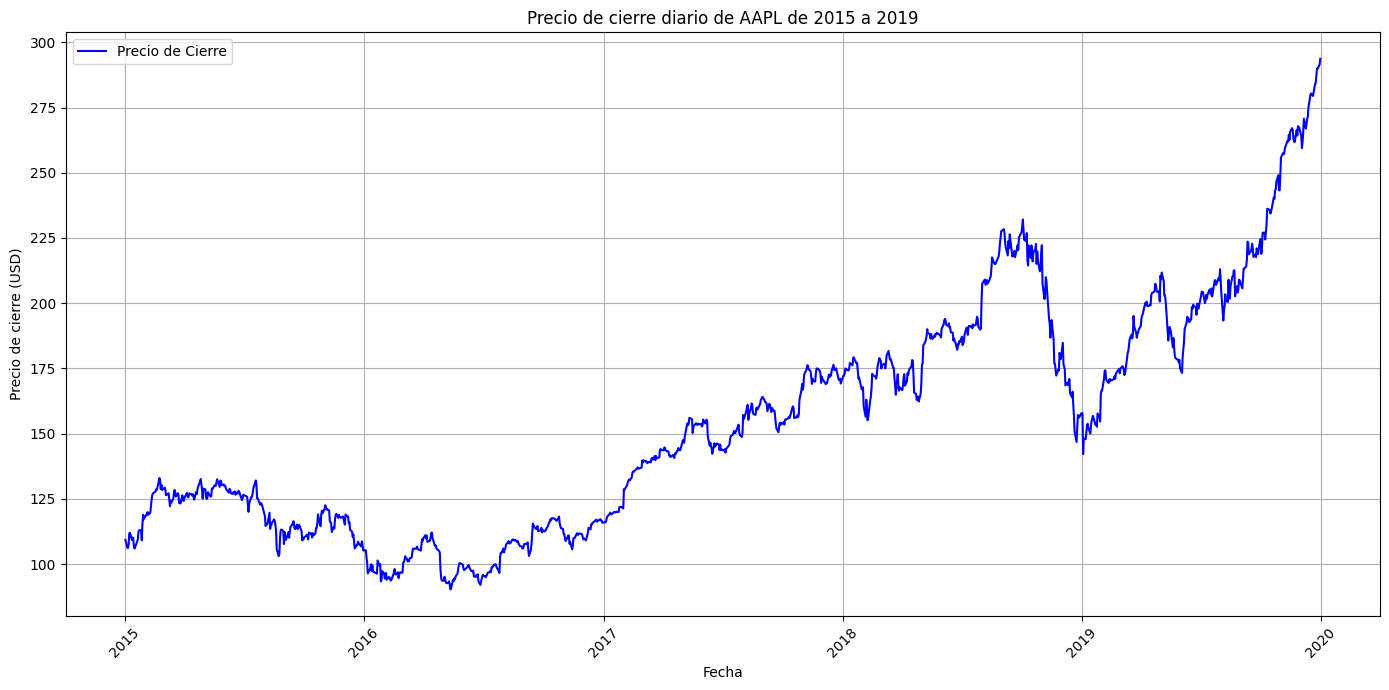

In [8]:
import matplotlib.pyplot as plt

# Asegúrate de que df_filtrado tiene el índice como fecha y la columna 'close' disponible
# df_filtrado debería tener columnas como ['open', 'high', 'low', 'close', 'volume']

# Configurando y mostrando el gráfico
plt.figure(figsize=(14, 7))  # Configura el tamaño del gráfico
plt.plot(df_filtrado['close'], label='Precio de Cierre', color='blue')  # Dibuja la línea del precio de cierre
plt.title('Precio de cierre diario de AAPL de 2015 a 2019')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Precio de cierre (USD)')  # Etiqueta del eje Y
plt.legend()  # Añade una leyenda
plt.grid(True)  # Añade una cuadrícula para mejor visualización
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor lectura
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el gráfico se ajuste al área de visualización
plt.show()  # Muestra el gráfico


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


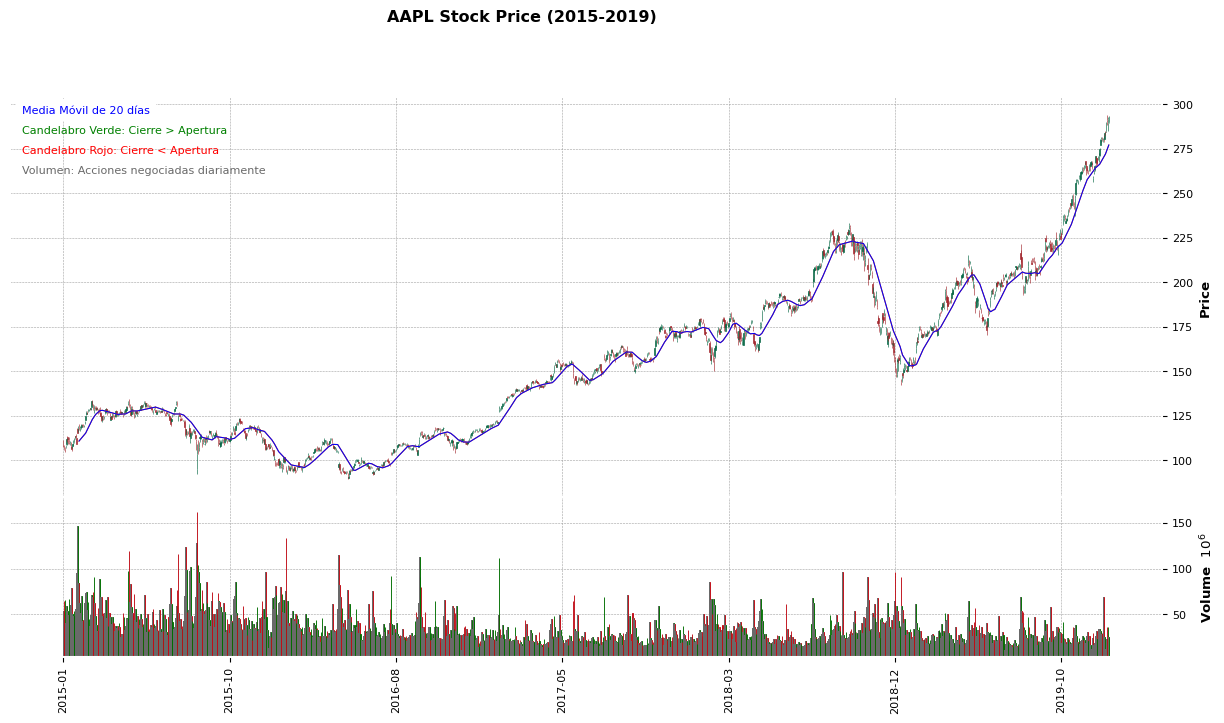

In [17]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Configura el estilo del gráfico
mpf_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

# Configura los argumentos adicionales para mejorar la legibilidad
kwargs = dict(
    type='candle', 
    mav=(20),  # Media móvil de 20 periodos
    volume=True, 
    title='AAPL Stock Price (2015-2019)', 
    style=mpf_style, 
    figsize=(16, 8),  # Tamaño del gráfico
    datetime_format='%Y-%m',  # Formato de la fecha
    xrotation=90  # Rotación de las etiquetas del eje X
)

# Agregar el panel para el volumen y la media móvil con un grosor específico
addplot = [
    mpf.make_addplot(df_filtrado['volume'], type='bar', panel=1, color='dimgray', ylabel='volume'),
    mpf.make_addplot(df_filtrado['close'].rolling(window=20).mean(), color='blue', width=0.75, ylabel='Media Móvil')  # Media móvil en azul y con línea más gruesa
]

# Dibujar el gráfico
fig, axes = mpf.plot(df_filtrado, addplot=addplot, **kwargs, returnfig=True)

# Añadir anotaciones
ax = axes[0]  # El eje del gráfico principal
ax.text(0.01, 0.98, 'Media Móvil de 20 días', transform=ax.transAxes, fontsize=8, color='blue', backgroundcolor='white', ha='left', va='top')
ax.text(0.01, 0.93, 'Candelabro Verde: Cierre > Apertura', transform=ax.transAxes, fontsize=8, color='green', ha='left', va='top')
ax.text(0.01, 0.88, 'Candelabro Rojo: Cierre < Apertura', transform=ax.transAxes, fontsize=8, color='red', ha='left', va='top')
ax.text(0.01, 0.83, 'Volumen: Acciones negociadas diariamente', transform=ax.transAxes, fontsize=8, color='dimgray', ha='left', va='top')

# Mostrar el gráfico
plt.show()



In [18]:
import pandas as pd

# Asumiendo que 'df_filtrado' ya está cargado y su índice es la fecha
data = df_filtrado['close'].asfreq('B')  # 'B' significa días hábiles, que es común para datos de acciones



In [19]:
# Dividir los datos en entrenamiento y prueba
train_data = data[:int(0.8*len(data))]  # 80% para entrenamiento
test_data = data[int(0.8*len(data)):]  # 20% para prueba


In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Construir el modelo ARIMA en los datos de entrenamiento
model = ARIMA(train_data, order=(1,1,1))  # (p, d, q) - estos son valores iniciales comunes
fitted_model = model.fit()

# Mostrar el resumen del modelo
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1042
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2245.099
Date:                Tue, 07 May 2024   AIC                           4496.199
Time:                        13:42:26   BIC                           4511.042
Sample:                    01-02-2015   HQIC                          4501.829
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7094      0.152     -4.661      0.000      -1.008      -0.411
ma.L1          0.7574      0.142      5.320      0.000       0.478       1.036
sigma2         4.9686      0.122     40.685      0.0

In [46]:
!pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/615.0 kB ? eta -:--:--
   - -------------------------------------- 30.7/615.0 kB ? eta -:--:--
   - -------------------------------------- 30.7/615.0 kB ? eta -:--:--
   -- ------------------------------------ 41.0/615.0 kB 281.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/615.0 kB 525.1 kB/s eta 0:00:01
   ------ ------------------------------- 102.4/615.0 kB 492.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/615.0 kB 481.4 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/615.0 kB 481.4 kB/s eta 0:00:02
   -------------- ----------------------- 235.5/615.0 kB 686.8 kB/s eta 0:00:01
   -------------- ----------------------- 235.5/615.0 kB 686.8 kB/s eta 0:00:01
   ------------------ ------------------- 307.2/615.0 kB 705.4 kB/s eta 0:00:01
   ------------------- ------------------ 317.4/615.0 kB 634.7 kB/s

In [50]:
# Verificar si hay valores NaN en los datos
print(train_data.isna().sum())

#Eliminar los valores NaN
train_data_clean = train_data.dropna()




36


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4492.678, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4494.230, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4495.105, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4494.966, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4492.687, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4495.798, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4495.478, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4494.800, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4497.520, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4492.921, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4497.374, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4497.076, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4491.121, Time=1.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4492.203, Time=1.46 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


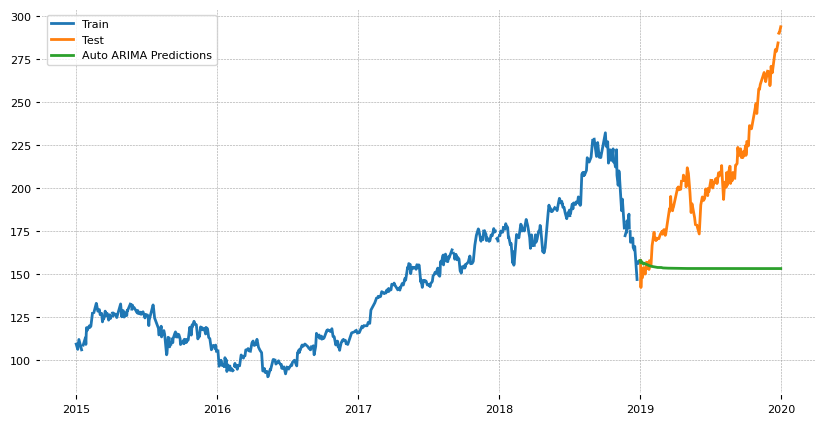

In [51]:
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

# Ajustar el modelo ARIMA automáticamente (asegurándose de que train_data_clean no tiene NaN)
auto_model = pm.auto_arima(train_data_clean, seasonal=False, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

# Resumen del modelo
print(auto_model.summary())

# Predicciones para el periodo de prueba
n_periods = len(test_data)
predictions = auto_model.predict(n_periods=n_periods)
predictions_index = pd.date_range(start=test_data.index[0], periods=n_periods, freq='B')

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(predictions_index, predictions, label='Auto ARIMA Predictions')
plt.legend(loc='upper left')
plt.show()


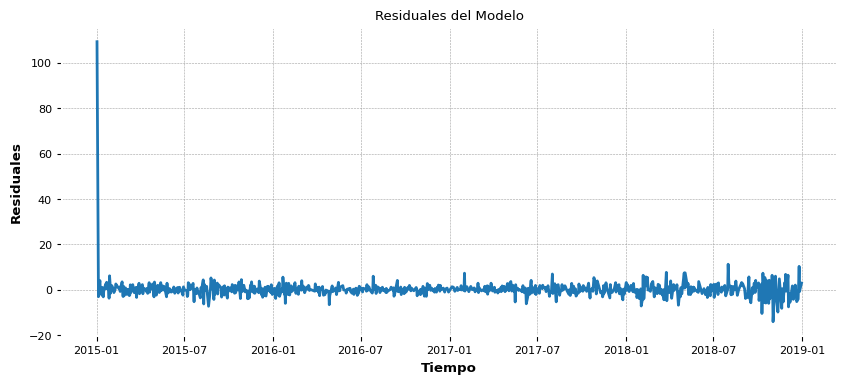

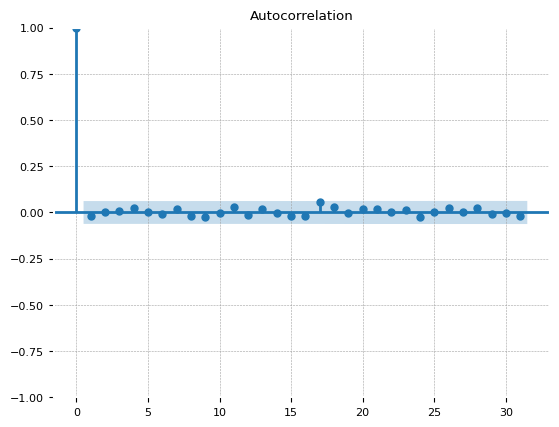

In [52]:
residuals = auto_model.resid()
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuales del Modelo')
plt.xlabel('Tiempo')
plt.ylabel('Residuales')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()


In [54]:
import pandas as pd
import pmdarima as pm

# Asegurando que no hay NaN
train_data_clean = train_data.dropna()

# O, si prefieres imputar
# train_data_clean = train_data.fillna(train_data.mean())  # O cualquier otro método de imputación

# Intentar ajustar el modelo nuevamente
seasonal_model = pm.auto_arima(train_data_clean, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)
print(seasonal_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4494.230, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4496.983, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4496.822, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4492.687, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4496.125, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4496.106, Time=0.10 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4495.105, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4494.966, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4492.921, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 4.037 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                 1042
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2253.662
Date:                            Tue, 07 May 2024   AIC                           4517.325
Time:                                    14:06:09   BIC                           4542.006
Sample:                                01-02-2015   HQIC                          4526.692
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7105      0.152     -4.677      0.000      -1.008      -0.413
ma.L1          0.7613      0.141   

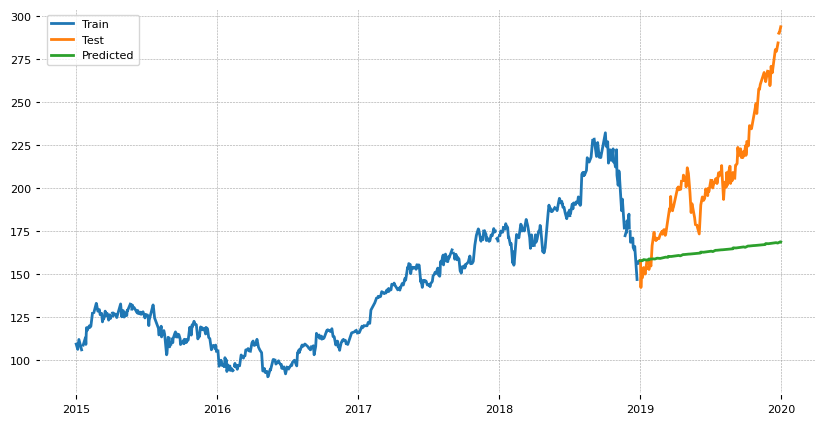

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar un modelo SARIMA con parámetros seleccionados manualmente
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Ver el resumen del modelo
print(result.summary())

# Hacer predicciones
predictions = result.get_forecast(steps=len(test_data))
predicted_means = predictions.predicted_mean

# Visualizar las predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predicted_means, label='Predicted')
plt.legend(loc='upper left')
plt.show()


In [56]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
result = model.fit(disp=False)
print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                 1042
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2253.714
Date:                            Tue, 07 May 2024   AIC                           4515.428
Time:                                    14:10:06   BIC                           4535.174
Sample:                                01-02-2015   HQIC                          4522.923
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7167      0.145     -4.936      0.000      -1.001      -0.432
ma.L1          0.7676      0.135   

In [57]:
import numpy as np

# Transformar los datos
train_data_log = np.log(train_data)

# Ajustar el modelo SARIMAX en datos transformados
model = SARIMAX(train_data_log, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
result = model.fit(disp=False)
print(result.summary())

# Antitransformar las predicciones si es necesario
predictions_log = result.get_forecast(steps=len(test_data))
predictions = np.exp(predictions_log.predicted_mean)


                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                 1042
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                2698.347
Date:                            Tue, 07 May 2024   AIC                          -5388.694
Time:                                    14:13:26   BIC                          -5368.949
Sample:                                01-02-2015   HQIC                         -5381.200
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2274      0.484     -0.470      0.639      -1.176       0.721
ma.L1          0.2785      0.480   

                                      SARIMAX Results                                       
Dep. Variable:                                close   No. Observations:                 1042
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2256.177
Date:                              Tue, 07 May 2024   AIC                           4516.353
Time:                                      15:01:36   BIC                           4526.226
Sample:                                  01-02-2015   HQIC                          4520.100
                                       - 12-31-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9918      0.027    -36.758      0.000      -1.045      -0.939
sigma2         5.05

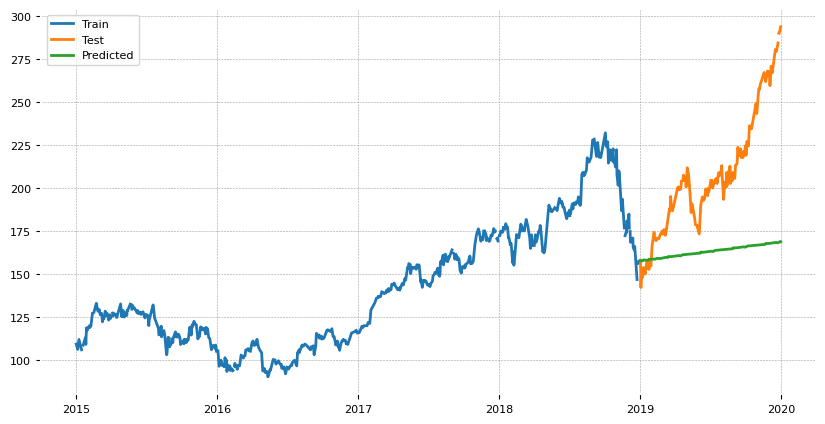

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar un modelo simplificado
simple_model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
simple_result = simple_model.fit(disp=False)
print(simple_result.summary())

# Evaluar y visualizar las predicciones
predictions = simple_result.get_forecast(steps=len(test_data))
predicted_means = predictions.predicted_mean

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predicted_means, label='Predicted')
plt.legend(loc='upper left')
plt.show()


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Prepara los datos
data = df_filtrado['close']

# Ajusta el modelo ARIMA
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Realiza predicciones
predictions = model_fit.forecast(steps=5)  # Predicciones para los próximos 5 días

print(predictions)

1258    293.543366
1259    293.634297
1260    293.556756
1261    293.622878
1262    293.566494
Name: predicted_mean, dtype: float64


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                 1042
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 252)   Log Likelihood               -1893.599
Date:                             Tue, 07 May 2024   AIC                           3797.198
Time:                                     16:13:26   BIC                           3820.551
Sample:                                 01-02-2015   HQIC                          3806.175
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4808      0.411     -1.171      0.242      -1.286       0.324
ma.L1          0.5263      

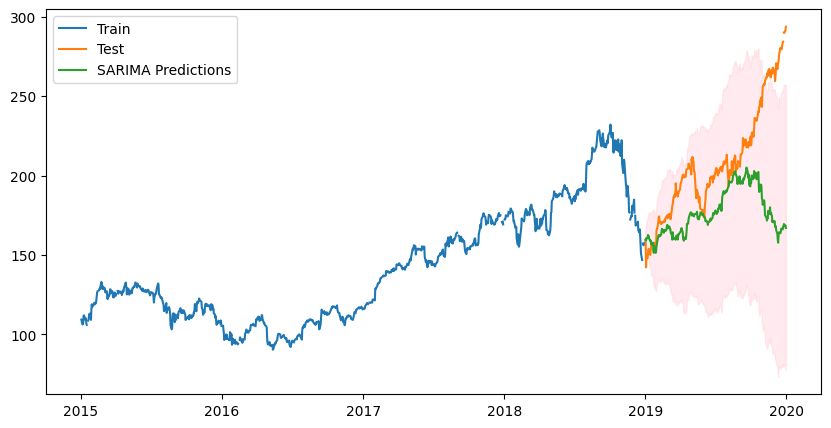

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asumiendo que 'df_filtrado' ya está cargado y su índice es la fecha
data = df_filtrado['close'].asfreq('B')  # 'B' significa días hábiles, que es común para datos de acciones

# Dividir los datos en entrenamiento y prueba
train_data = data[:int(0.8*len(data))]  # 80% para entrenamiento
test_data = data[int(0.8*len(data)):]  # 20% para prueba

# Construir el modelo SARIMA en los datos de entrenamiento
# Suponiendo estacionalidad anual (s=252 días hábiles en un año)
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,252))
fitted_model = model.fit()

# Mostrar el resumen del modelo
print(fitted_model.summary())

# Hacer predicciones
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = fitted_model.get_prediction(start=pred_start_date, end=pred_end_date)
pred_conf_int = predictions.conf_int()

# Comparar predicciones con los valores reales
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, label='SARIMA Predictions')
plt.fill_between(predictions.predicted_mean.index, pred_conf_int.iloc[:, 0], pred_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1042
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2245.099
Date:                Wed, 08 May 2024   AIC                           4496.199
Time:                        11:40:56   BIC                           4511.042
Sample:                    01-02-2015   HQIC                          4501.829
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7094      0.152     -4.661      0.000      -1.008      -0.411
ma.L1          0.7574      0.142      5.320      0.000       0.478       1.036
sigma2         4.9686      0.122     40.685      0.0

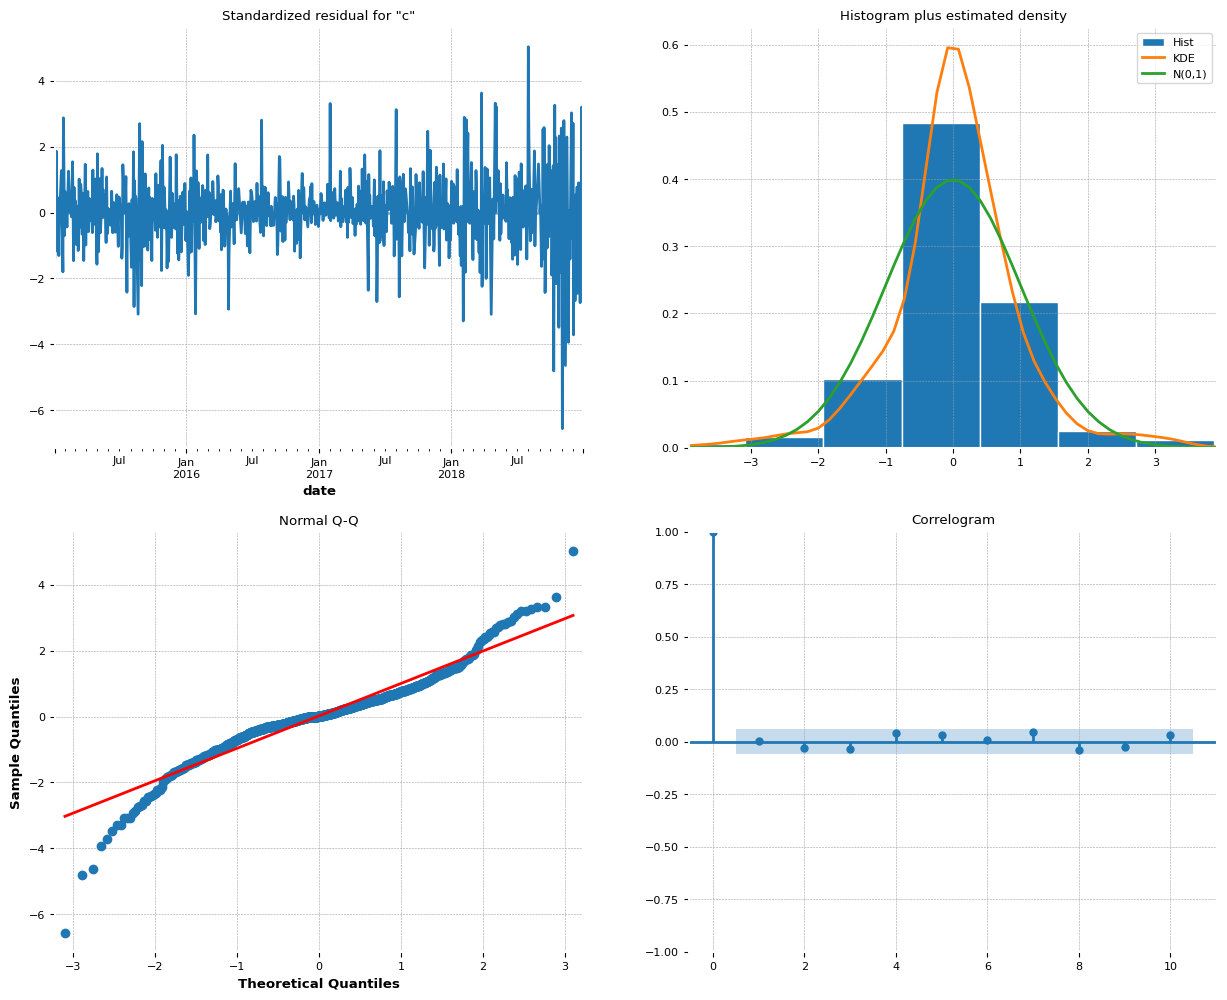

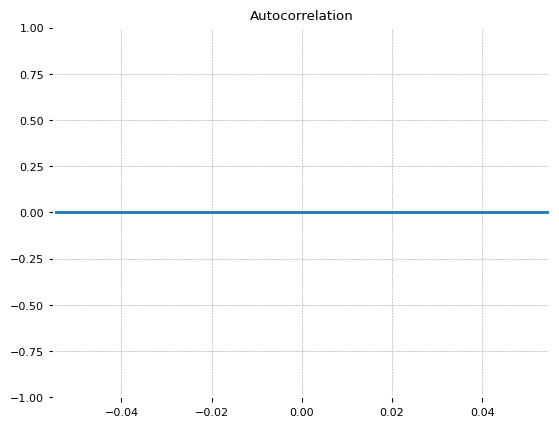

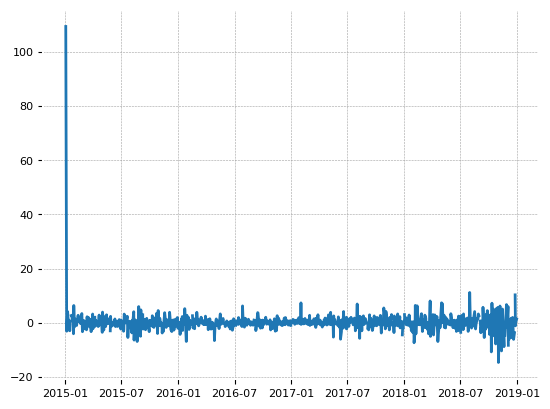

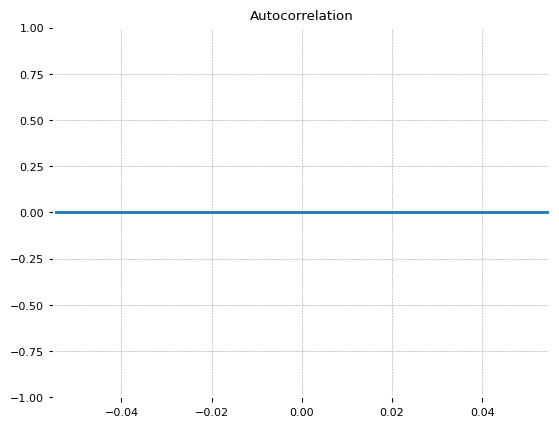

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
import statsmodels.api as sm


# Ajustar un modelo SARIMA más simple sin componentes estacionales
model_simple = SARIMAX(train_data, order=(1,1,1))
results_simple = model_simple.fit()

print(results_simple.summary())

# Diagnóstico del modelo
results_simple.plot_diagnostics(figsize=(15, 12))
plt.show()

# Verificar los residuos
residuos = results_simple.resid
plt.figure()
plt.plot(residuos)
plot_acf(residuos)  # Debería parecer ruido blanco


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1042
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2765.555
Date:                Wed, 08 May 2024   AIC                          -5525.110
Time:                        11:41:04   BIC                          -5510.266
Sample:                    01-02-2015   HQIC                         -5519.479
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0822      0.452     -0.182      0.856      -0.968       0.804
ma.L1          0.1424      0.451      0.316      0.752      -0.741       1.025
sigma2         0.0002   6.69e-06     34.668      0.0

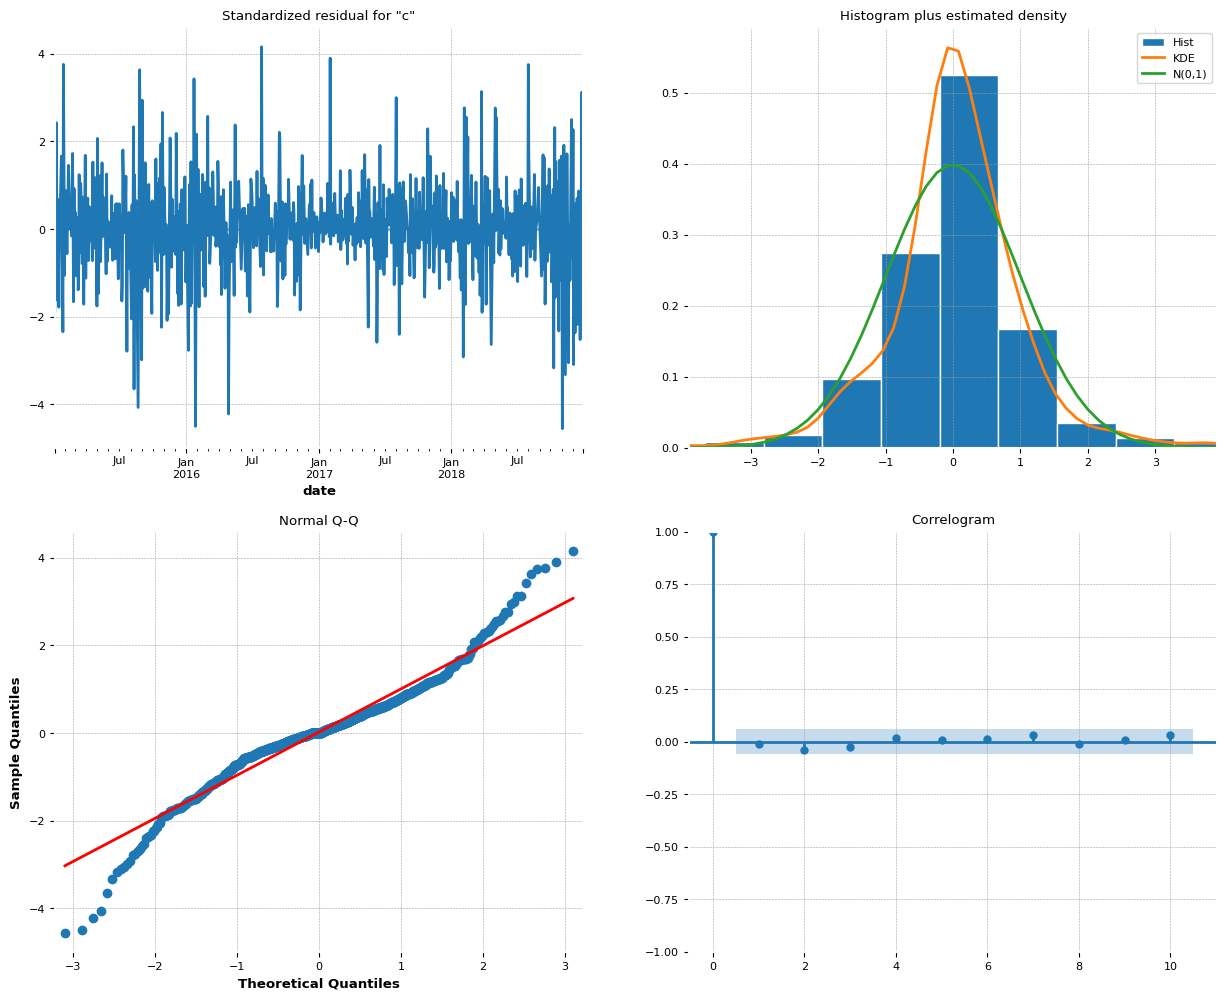

In [24]:
import numpy as np

# Transformación logarítmica
data_log = np.log(train_data)

# Ajustar un modelo ARIMA a los datos transformados
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_log = SARIMAX(data_log, order=(1,1,1), seasonal_order=(0,0,0,0))
results_log = model_log.fit()
print(results_log.summary())

# Diagnosticar el modelo
results_log.plot_diagnostics(figsize=(15, 12))
plt.show()


In [25]:
import itertools

p = d = q = range(0, 3)  # Rango común para p, d, y q
pdq = list(itertools.product(p, d, q))  # Combinaciones de p, d, y q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Ajustar según la estacionalidad que observes

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(data_log,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6058.8310752197085
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4785.985289128761
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:3572.693429621908
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-2951.01591475053
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-2945.969839582863
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:-2931.8298268594453
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:-2332.0197243011016
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:-2847.6488962279504
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:-2828.8463779031777
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-2958.7709169020527


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-2958.6145221097927
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:-2943.8133892451715
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-2941.79720574926
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-2942.8848428306183
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:-2930.055711898893
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:-2546.880411730381
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:-2845.0053020824516
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:-2828.398966984887
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:-2936.6813701684237
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:-2945.0000445519663
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:-2942.2408500883585
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:-2932.1290300954947
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:-2930.021445559458
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:-2928.028145088511
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:-2616.9402616195116
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:-2832.192450198402


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:-2834.558964405157
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4813.075459114596
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3463.0443658822933
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:2264.9150894645322
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-3847.6089457147123
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-3830.262081528748
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:-3807.2141179328864
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:-3096.3556604218847
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:-3726.568823922697
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:-3690.574277313362
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-3857.888181593253
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-3847.7576982826317
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:-3830.1239518352677


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-3832.560406604194
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-3829.0603418785518
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:-3805.4661916681034
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:-3374.8301129811043
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:-3719.6509044474838
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:-3689.1709029651824
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:-3833.300240374391


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:-3833.783872234566


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:-3812.0245059944245
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:-3807.6050984713147
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:-3804.1428357423993
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:-3802.782490652232
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:-3440.449674839165
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:-3692.5101115800053


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:-3694.002917145414
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:3558.8051790866075


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:3540.5407293707794
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:1229.7980355581954
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:-4243.165273348331
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:-4254.334397373137
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:-4225.13116092089
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:-3394.949495849175
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:-4124.717237398558
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:-4106.555890501845
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:-4256.677804642382


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:-4270.684082258926


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:-4236.800767448369
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:-4247.611524142904
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:-4252.77089806127


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:-4223.219768406856
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:-3733.607220991343
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:-4115.791244255536
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:-4100.678195882348


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:-4245.584443318595


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:-4244.862047798757


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:-4229.833483225115
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:-4231.277235211606
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:-4229.400304548124
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:-4221.459749169611
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:-3841.416700857638


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:-4109.311477201639


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:-4103.8458112229
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-5524.738145171553
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-5466.9848156909375
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:-5414.745707675082
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-4740.079683411808
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-5364.245984059284
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:-5295.537841633199
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:-3605.732118213188
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:-4616.360790695862
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:-5134.123163321616
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-5473.131689786235
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-5449.719374981108
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:-5412.860491219077
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-4999.4193835367405


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-5362.1885569394035
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:-5293.4561771335775
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:-4143.818763955701
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:-4854.17948794505
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:-5132.144463502182
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:-5420.709141212785
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:-5418.871898520425
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:-5406.944729707457
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:-5023.390320079072


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:-5306.83525110146
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:-5298.736345592608
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:-4362.824157214464
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:-4898.150207158465


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:-5120.469420367808
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-5517.0568080928
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-5461.659580962797
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:-5407.747681796459
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-4735.137166108482
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-5359.021675812224
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:-5293.188189071101
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:-3602.6189149073284
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:-4612.6278869004345
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:-5130.5255268694455
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-5472.236611856997
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-5444.713830236073
ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:-5405.794556011412
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-4998.919698750737


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-5339.378082378867
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:-5291.660530232259
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:-4143.776173803066
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:-4850.082344727464


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:-5105.097105780581
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:-5420.122531944613
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:-5418.221981510986
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:-5401.779858553478
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:-4949.767140296633
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:-5307.407587117104
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:-5296.576598350071
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:-4363.341477774099
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:-4897.200538385631


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:-5078.631668501967
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:-5512.903701737456
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:-5456.5439717009385
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:-5402.721306334585
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:-4736.965400314841
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:-5352.6570317970945
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:-5286.916148420201
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:-3606.474786339439
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:-4613.20363211466


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:-5122.352693422862
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:-5472.876487090824
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:-5437.546218359283


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:-5400.668348875704
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:-4999.878542520584


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:-5334.942503724693
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:-5285.9950785809715
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:-4147.503262905473
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:-4845.66321657301


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:-5099.621548464929
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:-5420.1230465980825


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:-5418.248548011858
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:-5397.012939293652
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:-4952.980353975014
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:-5125.215139880538
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:-4820.400580405836
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:-4363.289246408296
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:-4896.498276114418


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:-4974.081180563246
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-4839.164984496025
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-4787.393723148591
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-4746.994045784861
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-4066.505613238128
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-4697.311035679117
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-4638.473443235111
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:-2951.2214662957285
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:-3962.052058517035
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:-4482.708599884824
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-4792.437353587704
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-4785.39907531491
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-4744.981601099271
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-4334.561628642092
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-4676.321999159554
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-4635.489889381326
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:-3495.553366539526
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:-4199.02440

C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:-4471.749997279347
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-4752.149786821004
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-4750.1968879879905


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-4743.046390686002
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-4362.545968816716
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-4651.5104838074785


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:-4641.788397437016
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:-3729.319484317214
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:-4245.197969717244


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:-4471.883073592649
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:-5504.9663029587155
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:-5447.526451249784
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:-5395.476285661152
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:-4720.914245006604
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:-5339.715519585596
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:-5276.647061684655
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:-3590.051452658404
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:-4592.328611042143
ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:-5109.033593721192
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:-5458.301876693815
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:-5445.39159681809
ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:-5393.41146592264
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:-4985.8870599923475


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:-5321.305551400719
ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:-5277.366395866167


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:-4131.950053624415
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:-4831.186922733685


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:-5090.357632510354
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:-5403.964393063063
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:-5404.783006307989
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:-5391.406265074011


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:-5010.517387514832


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:-5288.114927079767


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:-5276.42784968405
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:-4350.4590075447595
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:-4879.280709636088


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:-4855.304617603015
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:-5500.382386056823
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:-5440.666771316027
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:-5387.610369587868
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:-4719.646043001452
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:-5335.149958475649
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:-5270.232755603345
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:-3589.648524286839
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:-4587.28865626916


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:-5110.32734965756


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:-5457.434846054877
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:-5425.257659263102
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:-5385.4868866703955
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:-4985.458249537172
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:-5332.949216301102
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:-5272.225845988314
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:-4132.001915957531
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:-4825.724813720584


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:-4923.329837241052
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:-5401.128963784039
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:-5401.853635848479
ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:-5383.522732895804
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:-5009.670576763732


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:-5184.019656460939


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:-5268.840749137584


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:-4351.073686291134


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:-4878.386553736625


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:-4862.24260191861
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-5526.22571148896
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-5466.780413990462
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:-5380.067044758083
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-4781.32682796053
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-5369.749933551319
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:-5300.830494934522
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:-3674.818917542472
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:-4657.79317461758
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:-5138.660366879072


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-5471.1949036642145


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-5446.4598825741305


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:-5411.246149186251
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-5019.115139409974
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-5367.639964801309


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:-5300.626572206405
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:-4186.898310324885
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:-4879.778370830961


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:-5111.858413225977
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:-5016.3479642206075


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:-5392.298582933597


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:-5404.117216773507
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:-5038.617325938572


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:-5304.466953635027
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:-5304.725093056898
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:-4396.499894840587
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:-4910.943483815837
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:-4941.119532634241
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-5522.532789159781
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-5382.779640420073
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:-5373.8804826957785


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-4783.732572857165
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-5364.624883638541
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:-5293.51391641546
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:-3684.06339874732
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:-4657.76482721685
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:-5134.989568892413


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-5447.572522010237


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-5432.691403025197
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:-5379.637452055926
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-5020.991731808087
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-5362.2803860543
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:-5291.854633857953


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:-4193.445298149118
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:-4876.146940123641


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:-5093.803253638216


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:-5018.081332437965


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:-5377.137632255124


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:-5353.076156533582
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:-5039.173037083958
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:-5294.945845825196
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:-5297.698317643479
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:-4401.673410068272
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:-4909.537078090838


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:-5045.909058459838
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:-5517.021452652846
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:-5423.980664596604


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:-5355.349509188409
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:-4780.053297148796
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:-5357.959627412902
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:-5292.102394065901
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:-3678.8036054998142
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:-4653.973661705508
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:-5127.016751998994


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:-5466.994047912098
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:-5413.462221810201


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:-5387.119104453725
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:-5019.862043344896
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:-5336.177552223672
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:-5291.249850257561
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:-4192.191814929679


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:-4871.186912790577


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:-5102.10006105022
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:-4763.320400671042
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:-5398.572648813411


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:-5353.5412011065855
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:-4977.385127257254


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:-5117.681247107872
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:-5293.347065295195
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:-4399.697456996119
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:-4909.700528294099


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:-4984.703257575769
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-5523.880573242146
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-5465.962241165495
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:-5413.978540625449
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-4739.405658658248
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-5364.7779721953375
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:-5293.976288720537
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:-3605.5909883248487
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:-4615.891631150487
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:-5135.512749858106
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-5465.841460576919
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-5450.479769652728
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:-5412.078274659536
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-4991.470369058595
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-5362.45194758242


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:-5294.31958024404
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:-4138.123052327225
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:-4853.513984945789
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:-5106.91499860974
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:-5414.0131061732645


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:-5411.910905869243


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:-5408.705204209755
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:-4946.346529023682


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:-5299.987481463371
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:-5298.246684130076
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:-4357.770332665947
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:-4890.139999155948


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:-5094.44922420204
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-5515.862167546655
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-5461.659526045294
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:-5406.0326533414645
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-4734.727527047029
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-5358.111506725116
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:-5292.194894291273
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:-3664.5365535733445
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:-4646.4424527775045


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:-5129.043161330232
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-5464.093968069756
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-5442.872136322947


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:-5402.851607217566
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-4990.2911183364195


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-5356.060504175544
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:-5293.784473627113


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:-4180.212534892093
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:-4848.333065584486
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:-5119.7379916853215
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:-5412.280055029985


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:-5410.6477548576595
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:-5398.2768234915075
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:-4827.572400408699


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:-5297.580865106367
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:-5294.6960483042185
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:-4356.183269468189
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:-4888.25661654587


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:-5068.4990522695225
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:-5511.116014216721
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:-5454.524328887309
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:-5401.080298425444
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:-4730.110334913534
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:-5351.200264259585


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:-5285.851821956792
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:-3604.4867718349024
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:-4611.123839453285


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:-5120.486560757812
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:-5465.164277607304
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:-5435.5298876754605
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:-5398.633455248211
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:-4991.476131703803


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-5332.382946209252
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:-5284.219954700215
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:-4140.073344097811
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:-4843.915195621668


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:-5118.55042746548
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:-5411.861711080202
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:-5403.976230881017
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:-5396.516388133425
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:-4942.406480695416


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:-5299.892583837782


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:-5285.602498321645
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:-4356.290651735523


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:-4887.823134669389


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:-5046.535466155806
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:-5073.27160199918
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:-5025.79918614014
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:-4982.250658021669
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:-4275.106283989223


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:-4928.925227426039
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:-4867.043769317721
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:-3150.0237418816805
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:-4167.151737322212
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:-4712.750772507268
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:-5024.394358796669
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:-5023.839662076629
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:-4980.436766258048
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:-4557.182385716517
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:-4878.449205100771
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:-4867.023420462495
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:-3702.375443109791
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:-4425.09150904512


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:-4710.450613964158
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:-4982.512332890765
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:-4980.536372185832
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:-4978.697543024769
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:-4599.909253264488


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:-4816.121435587718


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:-4875.3165393993495
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:-3943.973800778731


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:-4475.858241613947


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:-4593.33265686865
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:-5503.578681574174
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:-5446.162594653824
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:-5394.665963638054


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:-4720.278332016629
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:-5340.955670957558
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:-5274.84293664754
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:-3589.9658611426894


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:-4591.900239596156


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:-5111.6038760386145
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:-5452.153331158273
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:-5444.160047580169
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:-5392.667762625896
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:-4978.932223577736


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:-5320.235843512288
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:-5276.265216399131


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:-4127.0805978987155
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:-4830.596361968504


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:-5054.457603722631
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:-5399.577084550609
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:-5397.563400142168


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:-5389.348575154834
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:-5006.7183672272895


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:-5283.624186132089
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:-5275.336600952211
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:-4345.722496138997


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:-4872.322766797939


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:-4848.604027268144
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:-5501.777051893534
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:-5440.215344708783
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:-5387.112359270824
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:-4721.426155155392


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:-5334.708252298464
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:-5269.816867141553
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:-3659.746850518284
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:-4620.69783619002


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:-5106.104575888943
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:-5451.144820288924
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:-5438.006423735467
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:-5385.489142634171
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:-4979.153852755185


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:-5315.391648739467
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:-5272.070628443238
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:-4131.590079136623
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:-4823.1194096940635


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:-5081.684420359901
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:-5385.379499067779


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:-5382.316226097956
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:-5382.891160563577
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:-5004.009616428573
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:-5158.765471427534
ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:-5268.115684402017
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:-4342.66394901594


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:-4873.799080300495


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:-4989.944778234832
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:-5522.396209628361


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:-5463.084996176472
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:-5375.906955685445
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:-4782.82323591322
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:-5369.614136588506
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:-5299.157992229793


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:-3682.909390755609
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:-4662.400033106773


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:-5138.447196559341
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:-4781.660436617423


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:-5408.282692717326


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:-5384.904170704544
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:-5014.73032512789
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:-5361.947330184664
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:-5297.682058108305
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:-4187.699513186861
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:-4875.956729794288


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:-5091.41551388512
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:-5011.875729554314


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:-5393.553377247874


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:-5353.55047460915
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:-4972.148761034656


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:-5298.438712469491


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:-5298.070565702477
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:-4395.927586190303


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:-4906.111714318223


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:-4982.308541705461


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:-5521.040967644001


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:-5451.950204491253
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:-5367.874778211538
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:-4780.091061413937
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:-5361.710015244755


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:-5291.04956093687
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:-3726.993275558353


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:-4659.7077073373675


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:-5125.439059800736
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:-5463.212810285748
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:-5433.871232943855


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:-5401.124959015109
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:-5012.459828398141


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:-5355.761996505386
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:-5289.310882290849
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:-4221.394266039351
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:-4875.85954612848


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:-5093.4030896997265


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:-5402.972340780234


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:-5382.1249850532795


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:-5346.60792290719
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:-5031.013150947978


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:-5275.647771639353


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:-5293.600546932751


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:-4413.075502902471


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:-4905.026804028381


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:-4912.630419421642
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:-5514.963791479938
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:-5278.025136335976
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:-5296.885066541823
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:-4774.738839282339


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:-5353.756522549551


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:-5262.700673551908
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:-3723.4297455853225


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:-4654.878087561548


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:-5118.802916738847


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:-4781.019118338569


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:-5455.771251345412


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:-5387.202970816108
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:-5011.691046207743


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:-5343.951513883294


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:-5276.371178113775
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:-4221.299540238819


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:-4870.554282739071


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:-5048.575543644316
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:-5008.932056593605
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:-5384.427093946863
ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:-5387.880103671883
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:-5003.656360221413


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:-5280.649666521028


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:-5171.664605271218


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:-4412.439960824735


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:-4903.140704031085


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:-4871.033004340416
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:-5518.96531352539
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:-5466.286299005467
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:-5414.266698561511
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:-4743.201281191728
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:-5363.777279237429
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:-5295.653231257723
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:-3612.106353913442
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:-4622.676258242187


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:-5131.557508805109
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:-5463.020721117453
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:-5445.670259360205
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:-5412.2228076867295
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:-4986.755954580016
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:-5340.687633540865


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:-5294.145044751619
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:-4139.245411307771
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:-4851.274002669079


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:-5091.879343131637
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:-5407.915280177736


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:-5403.190504846116


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:-5403.187694767181
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:-4941.812043367236


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:-5298.625707867896
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:-5296.691215115861
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:-4353.080454779358


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:-4885.462607350464


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:-5112.587406870994
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:-5517.193800933266
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:-5461.303180560202
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:-5404.981322076543
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:-4741.245457369883
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:-5356.578238971553
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:-5291.280780097491


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:-3670.483882074419


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:-4639.441422010183


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:-5125.5191841609


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:-5461.222465933295
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:-5441.2832569079455
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:-5404.969773365678
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:-4984.77911605861


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:-5336.982019358085
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:-5289.2316253474255
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:-4176.861666871917


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:-4847.355901369849


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:-4972.277818520812
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:-5407.476773774397


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:-5402.814301744047
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:-5403.347220917736
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:-4941.185322700399
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:-5295.918073699664
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:-5293.707982408841


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:-4384.013451254898


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:-4885.081624728757


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:-4871.884072229297
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:-5510.869192666968


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:-5460.012503804472
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:-5398.613662506963
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:-4733.7665081886
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:-5349.013664942141
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:-5282.966571409108


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:-3606.3027966647683


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:-4608.918153687589


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:-5119.183618038691


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:-5465.989825412082
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:-5434.7029384521


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:-5396.938748412415
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:-4983.778279174374


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:-5331.560860341743
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:-5282.499853774552
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:-4135.881720786141
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:-4838.349943480489


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:-5004.409154461009
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:-5403.894669776662


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:-5400.291453523636
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:-5391.944597425365
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:-4942.750230319105
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:-5290.382414444746
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:-5287.077487920021
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:-4349.033536572788


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:-4882.507945300087


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:-5102.355890772695
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:-5194.659266110702
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:-5147.067353828996


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:-5099.432808722791
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:-4423.832369541764
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:-5049.171680976646
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:-4991.485322614273
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:-3299.1895022511603
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:-4314.871060993424


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:-4831.081542587586
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:-5142.558026263174
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:-5140.6247412955745
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:-5095.484186241496


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:-4672.486697338283
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:-5042.217980450232
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:-4989.0335790446015


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:-3840.671044122002
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:-4538.297171204197


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:-4806.826462095037
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:-5093.902148799669
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:-5091.977514108034
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:-5090.236645820385
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:-4695.542222360502


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:-4987.992447568265
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:-4988.126515882843
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:-4043.7870934185466


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:-4570.822401083277


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:-4609.513750311771
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:-5503.876471358658
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:-5446.67466474518
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:-5394.921610872242
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:-4728.3150159635625
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:-5341.7883454564235


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:-5276.896070239349
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:-3599.5779343613713
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:-4598.49184290249


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:-5108.114711137921
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:-5448.1467697056905
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:-5446.172257176851
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:-5392.5367259585455


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:-4974.016436621205


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:-5322.511835880339
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:-5277.272221132875
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:-4126.453826394894
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:-4831.889561135501


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:-5086.754008093341
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:-5394.638166815457
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:-5392.764034573083


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:-5390.365767213096
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:-5001.187608541655


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:-5252.237728945029


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:-5277.4688723739155
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:-4341.379258744627


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:-4865.70536389114


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:-4843.59632794328
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:-5496.36578576607
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-5440.396461258428
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:-5384.913865999954


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:-4761.48715961943


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:-5331.931354607006


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:-5265.9299030330585
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:-3591.7921120786777


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:-4588.627446516455


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:-5106.191609633714
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-5443.049056741338


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-5437.949021355142


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-5382.8377799912605
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-4970.654639710868
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-5314.34591760299
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:-5268.818687737368


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:-4123.300603697728


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:-4821.9454184975075


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:-4872.9097061095945


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-5390.297896295439
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:-5388.319564205018


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:-5380.385926381681
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:-4997.95342347083


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:-5254.145711639634


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:-5266.623546655178


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:-4336.721915322478


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:-4863.493141209901


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:-4844.38618643629


In [27]:
import numpy as np

# Asumiendo que 'train_data' es un pandas DataFrame o Series:
# Eliminar cualquier valor 'inf' o '-inf'
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar cualquier valor 'NaN'
train_data.dropna(inplace=True)

# Ahora puedes intentar ajustar el modelo GARCH nuevamente
from arch import arch_model

garch_model = arch_model(train_data, vol='Garch', p=1, q=1)
results_garch = garch_model.fit(update_freq=5)
print(results_garch.summary())

# Predecir la volatilidad futura
forecasts = results_garch.forecast(horizon=5)
print(forecasts.variance[-1:])



Iteration:      5,   Func. Count:     29,   Neg. LLF: 5855.777593204256
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4473.390928540486
Iteration:     15,   Func. Count:     90,   Neg. LLF: 4558.611501156489
Iteration:     20,   Func. Count:    120,   Neg. LLF: 4360.951746387638
Iteration:     25,   Func. Count:    146,   Neg. LLF: 4359.1033440364945
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4359.10280598021
            Iterations: 28
            Function evaluations: 160
            Gradient evaluations: 28
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4359.10
Distribution:                  Normal   AIC:                           8726.21
Method:            Maximum Likeliho

In [2]:
!pip install arch

Defaulting to user installation because normal site-packages is not writeable


   ---------------------------------------- 0.0/926.4 kB ? eta -:--:--
   -- ------------------------------------- 61.4/926.4 kB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/926.4 kB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 358.4/926.4 kB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 501.8/926.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 655.4/926.4 kB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 737.3/926.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  911.4/926.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 926.4/926.4 kB 2.4 MB/s eta 0:00:00


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model wit

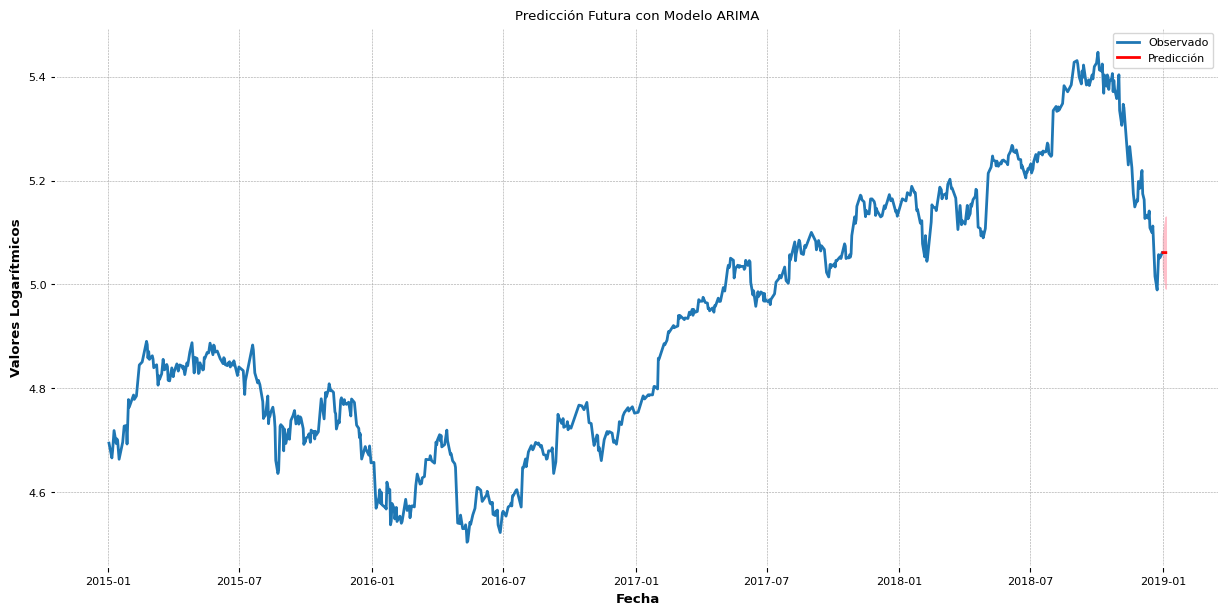

In [29]:
import matplotlib.pyplot as plt

# Ajustar el modelo con los parámetros óptimos (por ejemplo, p=1, d=1, q=1)
model_optimo = SARIMAX(data_log, order=(1,1,1), seasonal_order=(0,0,0,0))
results_optimo = model_optimo.fit()

# Realizar predicciones
predicciones = results_optimo.get_forecast(steps=5)  # 'steps' es el número de periodos futuros que quieres predecir
pred_conf = predicciones.conf_int()  # Intervalos de confianza

# Graficar los datos históricos
plt.figure(figsize=(15, 7))
plt.plot(data_log.index, data_log, label='Observado')

# Graficar las predicciones futuras
pred_fechas = [data_log.index[-1] + np.timedelta64(x, 'D') for x in range(1, 6)]  # Ajusta 'D' por la frecuencia de tus datos
plt.plot(pred_fechas, predicciones.predicted_mean, label='Predicción', color='r')

# Graficar los intervalos de confianza
plt.fill_between(pred_fechas,
                 pred_conf.iloc[:, 0],
                 pred_conf.iloc[:, 1], color='pink')

# Personalizar el gráfico
plt.title('Predicción Futura con Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valores Logarítmicos')
plt.legend()
plt.show()


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                 1042
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 252)   Log Likelihood                1850.611
Date:                             Wed, 08 May 2024   AIC                          -3691.223
Time:                                     14:33:02   BIC                          -3667.869
Sample:                                 01-02-2015   HQIC                         -3682.245
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6598      0.681      0.969      0.332      -0.675       1.994
ma.L1         -0.6398      

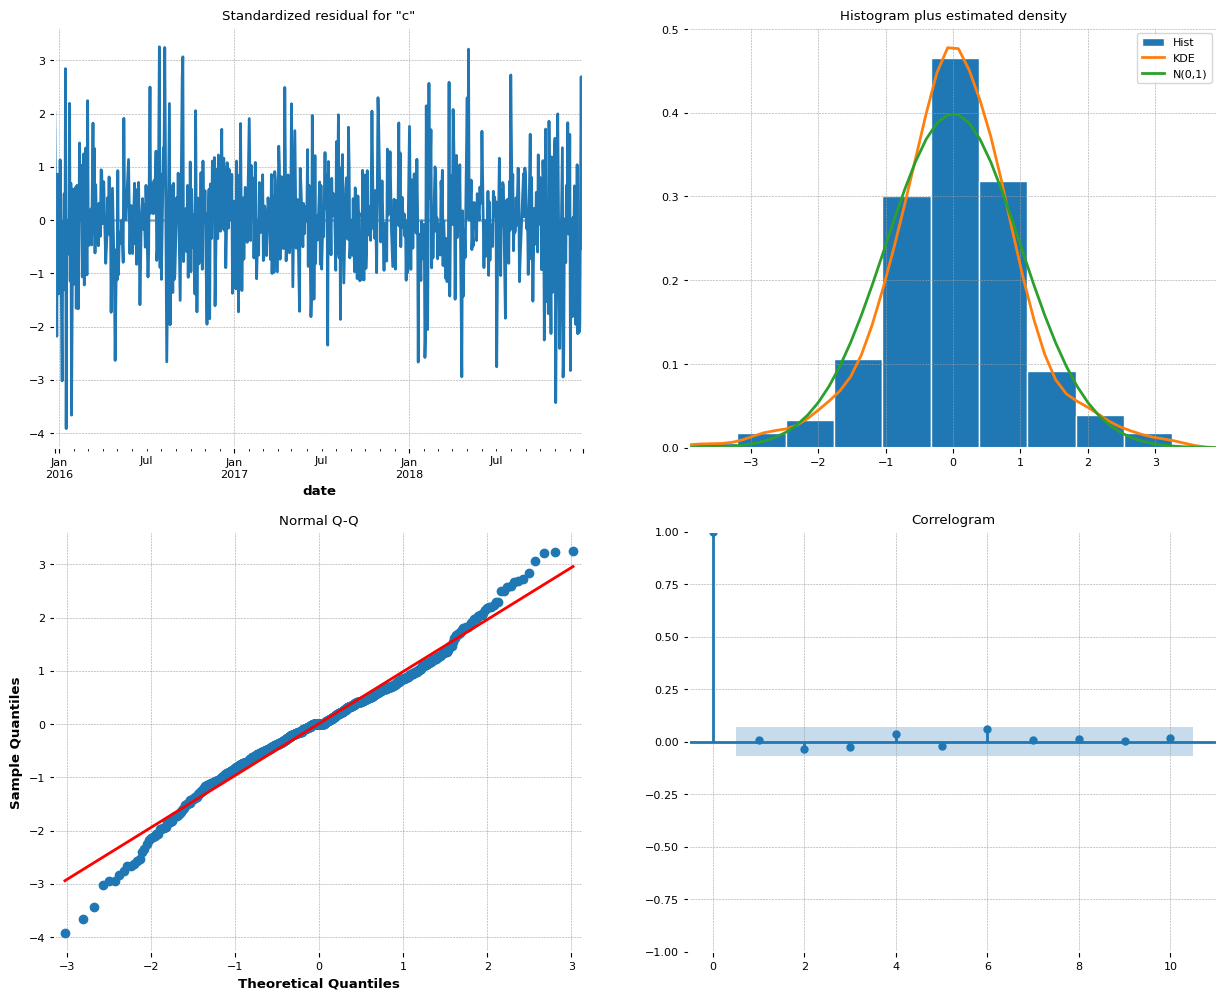

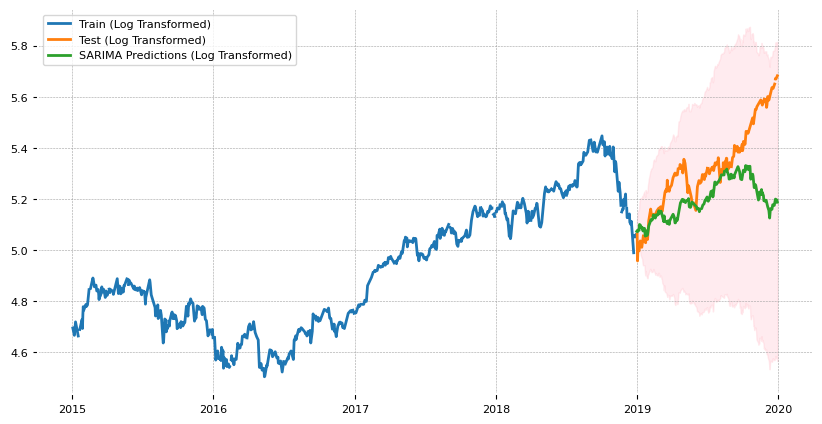

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asumiendo que 'df_filtrado' ya está cargado y su índice es la fecha
data = df_filtrado['close'].asfreq('B')  # 'B' significa días hábiles

# Transformación logarítmica
data_log = np.log(data)

# Dividir los datos transformados en entrenamiento y prueba
train_data_log = data_log[:int(0.8*len(data_log))]  # 80% para entrenamiento
test_data_log = data_log[int(0.8*len(data_log)):]  # 20% para prueba

# Construir el modelo SARIMA en los datos de entrenamiento transformados
model_log = SARIMAX(train_data_log, order=(1,1,1), seasonal_order=(1,1,1,252))
fitted_model_log = model_log.fit()

# Mostrar el resumen del modelo
print(fitted_model_log.summary())

# Diagnosticar el modelo
fitted_model_log.plot_diagnostics(figsize=(15, 12))
plt.show()

# Hacer predicciones
pred_start_date_log = test_data_log.index[0]
pred_end_date_log = test_data_log.index[-1]
predictions_log = fitted_model_log.get_prediction(start=pred_start_date_log, end=pred_end_date_log)
pred_conf_int_log = predictions_log.conf_int()

# Comparar predicciones con los valores reales
plt.figure(figsize=(10,5))
plt.plot(train_data_log.index, train_data_log, label='Train (Log Transformed)')
plt.plot(test_data_log.index, test_data_log, label='Test (Log Transformed)')
plt.plot(predictions_log.predicted_mean.index, predictions_log.predicted_mean, label='SARIMA Predictions (Log Transformed)')
plt.fill_between(predictions_log.predicted_mean.index, pred_conf_int_log.iloc[:, 0], pred_conf_int_log.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.show()


In [31]:
import itertools

p = d = q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float('inf')
best_params = None

for param in list(itertools.product(p, d, q)):
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_data_log,
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print('Mejor modelo: ARIMA{}x{} - AIC:{}'.format(best_params[0], best_params[1], best_aic))


C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\antap\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\antap\AppData\Roami

Mejor modelo: ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:-5526.22571148896


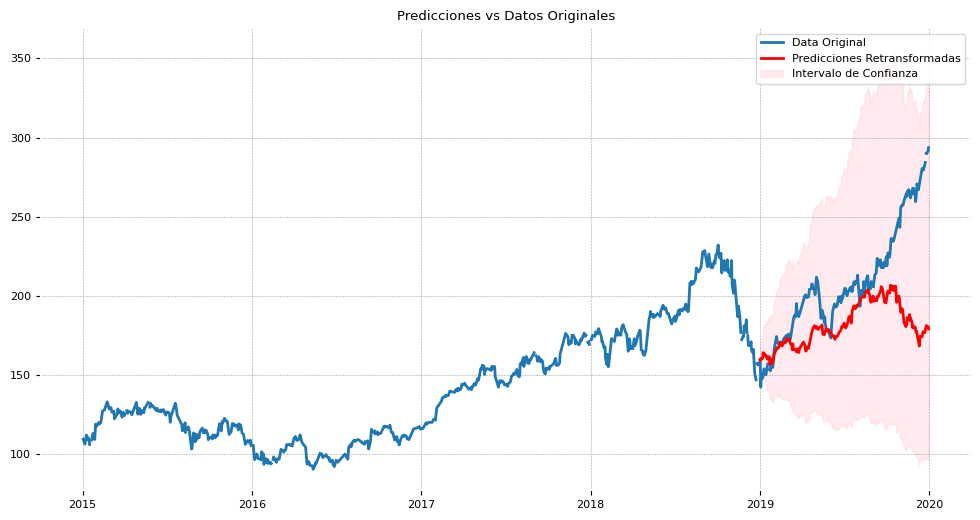

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Retransformar las predicciones a la escala original
predictions_original_scale = np.exp(predictions_log.predicted_mean)

# Retransformar los intervalos de confianza
conf_int_original = np.exp(pred_conf_int_log)

# Graficar los datos originales y las predicciones retransformadas
plt.figure(figsize=(12,6))
plt.plot(data.index, data, label='Data Original')
plt.plot(predictions_original_scale.index, predictions_original_scale, color='red', label='Predicciones Retransformadas')
plt.fill_between(conf_int_original.index, conf_int_original.iloc[:, 0], conf_int_original.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza')
plt.title('Predicciones vs Datos Originales')
plt.legend()
plt.show()


In [34]:
# Datos de prueba estén alineados y sin NaN
test_data_aligned = data[predictions_original_scale.index]
test_data_aligned = test_data_aligned.dropna()  # Eliminar cualquier NaN en los datos reales
predictions_original_scale = predictions_original_scale[test_data_aligned.index]  # Asegurar el mismo índice

# Verificando si aún hay NaNs
print("NaNs en datos de prueba:", test_data_aligned.isna().sum())
print("NaNs en predicciones:", predictions_original_scale.isna().sum())

# Calculando las métricas, asumiendo que ya no hay NaNs
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test_data_aligned, predictions_original_scale)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(test_data_aligned, predictions_original_scale)
print(f'MAE: {mae}')

mape = np.mean(np.abs((test_data_aligned - predictions_original_scale) / test_data_aligned)) * 100
print(f'MAPE: {mape}%')


NaNs en datos de prueba: 0
NaNs en predicciones: 0
MSE: 1666.4518682442203
RMSE: 40.822198228956516
MAE: 28.20952823098364
MAPE: 12.033450413774064%


### Análisis de Métricas

#### Mean Squared Error (MSE): 1666.4518682442203
Interpretación: El MSE es bastante alto; En contextos financieros donde las escalas de los datos son grandes, un MSE elevado puede ser común, pero sigue indicando que hay una gran variabilidad en los errores del modelo.
Impacto: Un MSE alto en datos financieros podría implicar que el modelo no captura todas las dinámicas del mercado, como reacciones a noticias o cambios económicos.

#### Root Mean Squared Error (RMSE): 40.822198228956516
Interpretación: El RMSE indica que, en promedio, el modelo se desvía del valor real en aproximadamente 40.82 unidades. 
Impacto: Para un inversor, un error promedio de más de 40 unidades podría afectar la toma de decisiones en cuanto a compra o venta de acciones.

#### Mean Absolute Error (MAE): 28.20952823098364
Interpretación:  Esto puede ser relevante si los precios varían ampliamente; en mercados estables, sin embargo, podría ser indicativo de un modelo que necesita mejoras.
Impacto: Un MAE de esta magnitud puede no ser ideal si se busca precisión en las predicciones para estrategias de trading de alta frecuencia o para la gestión de riesgos.

#### Mean Absolute Percentage Error (MAPE): 12.033450413774064%
Interpretación:  Para la inversión o la planificación financiera, un error del 12% es considerable y podría impactar significativamente la rentabilidad.
Impacto: Un MAPE del 12% puede ser aceptable en escenarios de pronósticos a largo plazo o para datos altamente volátiles, pero en el trading o la gestión de inversiones, donde las decisiones se basan en cambios porcentuales pequeños, este nivel de error puede ser problemático.
